## Problem Set 1, due January 17th at 11:59pm 


#### Before You Start
For this problem set, you should download the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser. You should also make sure the following libraries load correctly.

In [220]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Your numpy version: 1.20.3 (need at least 1.7.1)
Your SciPy version:  1.7.1 (need at least 0.12.0)
Your Pandas version:  1.3.4 (need at least 0.11.0)
Your Mapltolib version:  3.4.3 (need at least 1.2.1)
Your Scikit-Learn version: 0.24.2 (need at least 0.13.1)


#### Instructions: 
 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 

This data set uses the NYCFlights13 dataset. You can download the dataset from flights data that you downloaded from canvas (flights.zip).

Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [222]:
flights_df= pd.read_csv('C:/Users/Kruti/Desktop/IMT 574/PS01/flights/flights.csv')

In [223]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [224]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()

print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

#### Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [225]:
# JFK and LGA are New York airports and EWR is New Jersey hence we take it out from origin and we use Seattle as destination
flights_df1=flights_df[ (flights_df['dest']=='SEA') & (flights_df['origin'] != 'EWR')]

flights_df1.head(5)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
93,94,2013,1,1,743.0,13.0,1059.0,3.0,DL,N3760C,495,JFK,SEA,349.0,2422,7.0,43.0
404,405,2013,1,1,1421.0,26.0,1735.0,26.0,B6,N503JB,83,JFK,SEA,349.0,2422,14.0,21.0
656,657,2013,1,1,1824.0,-6.0,2203.0,-2.0,AA,N3ETAA,269,JFK,SEA,348.0,2422,18.0,24.0
660,661,2013,1,1,1826.0,-4.0,2154.0,-13.0,DL,N3772H,1643,JFK,SEA,334.0,2422,18.0,26.0
956,957,2013,1,2,729.0,-1.0,1011.0,-45.0,DL,N3768,495,JFK,SEA,309.0,2422,7.0,29.0


In [226]:
no_of_flights = len(flights_df1.index)
#print(no_of_flights)
print("There are " + str(no_of_flights) + " flights from NYC airports to Seattle")

There are 2092 flights from NYC airports to Seattle


 -- Write your answer in English here -- 

There are 2092 flights from NYC airports to Seattle. JFK and LGA are New York airports considered in calculation and EWR is New Jersey hence we take it out from origin and we use Seattle as destination.

(b) How many airlines fly from JFK to Seattle?

In [227]:
# Unique flights
flights_df2=flights_df[ (flights_df['dest']=='SEA') & (flights_df['origin'] == 'JFK')]

flights_df2.head(5)
#flights_df2

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
93,94,2013,1,1,743.0,13.0,1059.0,3.0,DL,N3760C,495,JFK,SEA,349.0,2422,7.0,43.0
404,405,2013,1,1,1421.0,26.0,1735.0,26.0,B6,N503JB,83,JFK,SEA,349.0,2422,14.0,21.0
656,657,2013,1,1,1824.0,-6.0,2203.0,-2.0,AA,N3ETAA,269,JFK,SEA,348.0,2422,18.0,24.0
660,661,2013,1,1,1826.0,-4.0,2154.0,-13.0,DL,N3772H,1643,JFK,SEA,334.0,2422,18.0,26.0
956,957,2013,1,2,729.0,-1.0,1011.0,-45.0,DL,N3768,495,JFK,SEA,309.0,2422,7.0,29.0


 -- Write your answer in English here -- 

In [228]:
no_of_flights_NYC = len(flights_df2.index)
#print(no_of_flights)
print("There are " + str(no_of_flights_NYC) + " flights from JFK to Seattle")

#Now for number of airlines we filter by carrier and flight variable
unique_carrier = flights_df2.carrier.unique()
unique_carrier_count = len(flights_df2.carrier.unique())
print("Unique air planes from JSK to Seattle as per carrier are:" + str(unique_carrier) + " which makes the airline count: " + str(unique_carrier_count))
unique_flight = flights_df2.flight.unique()
unique_flight_count = len(flights_df2.flight.unique())
print("Unique air planes from JSK to Seattle as per flight are:" + str(unique_flight)+ " which makes the airline count: " + str(unique_flight_count))


There are 2092 flights from JFK to Seattle
Unique air planes from JSK to Seattle as per carrier are:['DL' 'B6' 'AA'] which makes the airline count: 3
Unique air planes from JSK to Seattle as per flight are:[ 495   83  269 1643 1043 1889  183   63  161  263  442  235  443  419
  440 1915 1925  175 1443 1771 1543 1616] which makes the airline count: 22


So here we learn that all flights to Seattle run from JFK. Hence the answer/count for 1 and 2 is the same i.e. 2092.

If we want to calculate airline count then as per different carriers it is 3 and as per different flight it is 22.

(c) How many unique air planes fly from JFK to Seattle?

In [229]:
# For airplanes we use the variable tailnum
unique_tailnum = flights_df2.tailnum.unique()
unique_tailnum_count = len(flights_df2.tailnum.unique())
print("Unique air planes from JSK to Seattle as per carrier are:" + str(unique_tailnum) + " which makes the count: " + str(unique_tailnum_count))


Unique air planes from JSK to Seattle as per carrier are:['N3760C' 'N503JB' 'N3ETAA' 'N3772H' 'N3768' 'N712JB' 'N3745B' 'N717TW'
 'N3BAAA' 'N679DA' 'N607JB' 'N3HPAA' 'N3765' 'N713TW' 'N591JB' 'N3AUAA'
 'N3734B' 'N175DN' 'N599JB' 'N3ANAA' 'N3759' 'N624AG' 'N519JB' 'N3HNAA'
 'N3771K' 'N727TW' 'N663JB' 'N3764D' 'N3JLAA' 'N794JB' 'N3BKAA' 'N709JB'
 'N3BDAA' 'N3762Y' 'N706TW' 'N632JB' 'N3753' 'N3ECAA' 'N712TW' 'N504JB'
 'N3GJAA' 'N3757D' 'N67171' 'N597JB' 'N3GCAA' 'N639DL' 'N579JB' 'N510JB'
 'N3754A' 'N3HAAA' 'N718TW' 'N651JB' 'N3JHAA' 'N3756' 'N630JB' 'N3766'
 'N3EWAA' 'N586JB' 'N3746H' 'N3HVAA' 'N721TW' 'N775JB' 'N3HRAA' 'N723TW'
 'N789JB' 'N3758Y' 'N3DYAA' 'N710TW' 'N564JB' 'N3761R' 'N652JB' 'N3AYAA'
 'N687DL' 'N638JB' 'N3EPAA' 'N3HCAA' 'N3763D' 'N634JB' 'N587JB' 'N3AAAA'
 'N779JB' 'N3748Y' 'N3DMAA' 'N643JB' 'N3751B' 'N535JB' 'N3HDAA' 'N629JB'
 'N3GAAA' 'N704X' 'N559JB' 'N3755D' 'N705TW' 'N608JB' 'N3FKAA' 'N3769L'
 'N807JB' 'N169DZ' 'N648JB' 'N182DN' 'N565JB' 'N1201P' 'N760JB' 'N1605'
 '

Unique "planes" I am calculating with variable tailnum so hence we get the count as 464.

(d) What is the average arrival delay for flights from JFK to Seattle?

In [230]:
# Your code here
print("Average arrival delay for flights from JFK to Seattle is: " + str(flights_df2.arr_delay.mean()))

Average arrival delay for flights from JFK to Seattle is: -1.7566265060240964


 -- Write your answer in English here -- 

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

Above I state that LGA and JFK are in NYC and EWR is in New Jersey so I take EWR out of calculation. But here, for the sake of calculation and distinction I take EWR back in consideration since I know that all Seattle flight originate from JFK. If I were to be geographically correct ALL i.e. 100% flights to Seattle come for the JFK NYC airport, but we want proportion so let's use EWR as well.

In [231]:
# Your code here
flights_df3=flights_df[ (flights_df['dest']=='SEA')]

no_of_flights_all = len(flights_df3.index)
#print(no_of_flights)
print("There are " + str(no_of_flights_all) + " flights from NYC airports to Seattle")

There are 3923 flights from NYC airports to Seattle


 -- Write your answer in English here -- 

In [232]:
flights_df3.head(5)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
78,79,2013,1,1,724.0,-1.0,1020.0,-10.0,AS,N594AS,11,EWR,SEA,338.0,2402,7.0,24.0
93,94,2013,1,1,743.0,13.0,1059.0,3.0,DL,N3760C,495,JFK,SEA,349.0,2422,7.0,43.0
165,166,2013,1,1,857.0,6.0,1157.0,-25.0,UA,N45440,1670,EWR,SEA,343.0,2402,8.0,57.0
401,402,2013,1,1,1418.0,-1.0,1726.0,-6.0,UA,N37464,16,EWR,SEA,348.0,2402,14.0,18.0
404,405,2013,1,1,1421.0,26.0,1735.0,26.0,B6,N503JB,83,JFK,SEA,349.0,2422,14.0,21.0


In [233]:
proportion = pd.crosstab(flights_df3['dest'],flights_df3['origin']).apply(lambda r: r/r.sum(), axis=1)
proportion

origin,EWR,JFK
dest,,
SEA,0.466735,0.533265


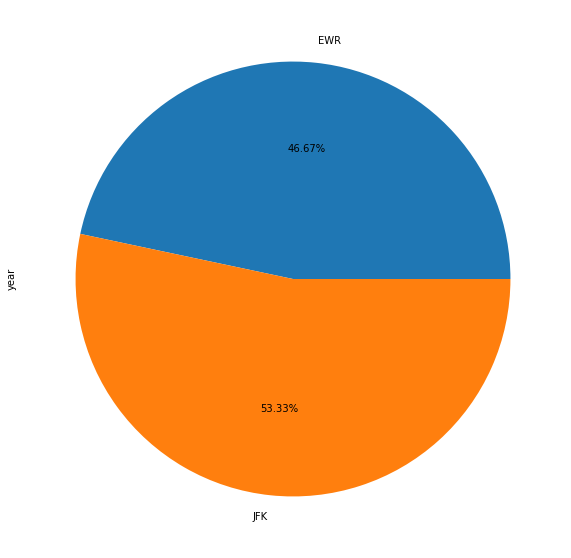

In [234]:
ax = (flights_df3.groupby('origin')['year'].sum()
        .plot.pie(figsize=(10,10),subplots=True, autopct='%.2f%%')
     )

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [235]:
# Your code here
flights_df['date'] = flights_df['month'].astype(str) + "-" + flights_df['day'].astype(str) + "-" + flights_df['year'].astype(str)
flights_df['date1'] = flights_df['month'].astype(str) + "-" + flights_df['day'].astype(str) + "-" + flights_df['year'].astype(str)

groupby_df = pd.DataFrame(flights_df.groupby('date').mean())

val_avg_dep_delay = groupby_df['dep_delay'].max()
date_avg_dep_delay = groupby_df['dep_delay'].idxmax()
val_avg_arr_delay = groupby_df['arr_delay'].max()
date_avg_arr_delay = groupby_df['arr_delay'].idxmax()

print("The date "+ str(date_avg_dep_delay) + " has the largest average departure delay of: " + str(val_avg_dep_delay))
print("The date "+ str(date_avg_arr_delay) + " has the largest average arrival delay of: " + str(val_avg_arr_delay))

The date 3-8-2013 has the largest average departure delay of: 83.5369211514393
The date 3-8-2013 has the largest average arrival delay of: 85.86215538847118


 -- Write your answer in English here -- 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights? This one has a few interpretations, just justify what you thought!


In [236]:
# Your code here
# Delayed flights are the worst, so worst day to fly out of NYC would be the one with highest delay time. 

max_delay = flights_df['dep_delay'].max()
max_delay_df = flights_df.loc[flights_df['dep_delay'] == max_delay]
highest_delay = max_delay_df.date
print("The delay of " + str(max_delay) + " making it the worst day to travel from NYC was at row and on date (MM-DD-YYYY) "+ str(highest_delay))


The delay of 1301.0 making it the worst day to travel from NYC was at row and on date (MM-DD-YYYY) 7072    1-9-2013
Name: date, dtype: object


If I am the one who is travelling I would want my flight to be least late, so for me I would not want to travel on the day which had the maximum delay in 2013. If we want to do a predictive analysis and look at a pattern from above questions we get to know that maximum average departure time was in the month of March, so even that makes it a bad month to travel. But, highest delay was in September so that is the worst day to travel.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

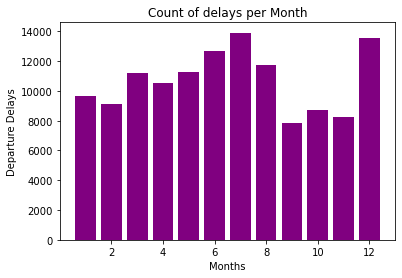

In [237]:
# We see detailed weather/seasonal patterns in question 6, here we see a trend of departure delays from NYC
positive_delay = flights_df[flights_df.dep_delay > 0]
group_df = pd.DataFrame(positive_delay.groupby([positive_delay.month])['dep_delay'].size().reset_index(name='Count'))
plt.bar(group_df.month, group_df.Count, color="purple")
plt.ylabel('Departure Delays')
plt.xlabel('Months')
plt.title('Count of delays per Month')
plt.show()

Although we see that March has maximum average departure time and September had highest delay on 1st, based on above graphy we see that July and December have a peak in terms of count. This is because of Holiday seasons - 4th of July for July and Christmas/New Year for December.

(d) On average, how do departure delays vary over the course of a day? Make a graph.

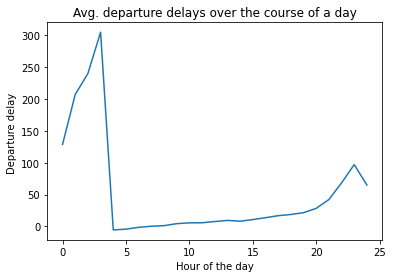

In [238]:
group_df = pd.DataFrame(flights_df.groupby([flights_df.hour])['dep_delay'].mean().reset_index(name='avg_dep_delay'))
plt.plot(group_df.hour, group_df.avg_dep_delay,'')
plt.ylabel('Departure delay ')
plt.xlabel('Hour of the day')
plt.title('Avg. departure delays over the course of a day')
plt.show()

We observe here that the departure delays are from midnight to early morning where people are most likely to be sleepy or sluggish.

## Question 3
    Which flight departing NYC in 2013 flew the slowest?

In [239]:
# As we know, speed = distance/time, we calculate speed here. The flight with lowest speed is the slowest.
flights_df['speed'] = flights_df['distance']/flights_df['air_time']
index_min = flights_df['speed'].idxmin()
print("Slowest Flight details: ")
flights_df.loc[index_min]

Slowest Flight details: 


Unnamed: 0        24099
year               2013
month                 1
day                  28
dep_time         1917.0
dep_delay          52.0
arr_time         2118.0
arr_delay         103.0
carrier              US
tailnum          N755US
flight             1860
origin              LGA
dest                PHL
air_time           75.0
distance             96
hour               19.0
minute             17.0
date          1-28-2013
date1         1-28-2013
speed              1.28
Name: 24098, dtype: object

 -- Write your answer in English here -- 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [240]:
# Here we groupby carrier, flights and destination and calculate the count. Whichever has the max count is the flight that runs everyday
group_df = pd.DataFrame(flights_df.groupby([flights_df.carrier,flights_df.flight,flights_df.dest]).size().reset_index(name='Count'))
max_flights = group_df[group_df.Count == max(group_df.Count)]
print(max_flights)
print("The destination of these flights from NYC is to: " + max_flights.dest.unique())

      carrier  flight dest  Count
767        AA      59  SFO    365
775        AA     119  LAX    365
783        AA     181  LAX    365
904        AA    1357  SJU    365
914        AA    1611  MIA    365
1118       B6     219  CLT    365
1147       B6     359  BUR    365
1150       B6     371  FLL    365
1169       B6     431  SRQ    365
1243       B6     703  SJU    365
1379       B6    1783  MCO    365
2012       DL    2159  MCO    365
2081       DL    2391  TPA    365
4631       EV    5712  IAD    365
5116       UA      15  HNL    365
10607      VX     251  LAS    365
10609      VX     407  LAX    365
10613      VX     413  LAX    365
['The destination of these flights from NYC is to: SFO'
 'The destination of these flights from NYC is to: LAX'
 'The destination of these flights from NYC is to: SJU'
 'The destination of these flights from NYC is to: MIA'
 'The destination of these flights from NYC is to: CLT'
 'The destination of these flights from NYC is to: BUR'
 'The destination 

 -- Write your answer in English here -- 

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


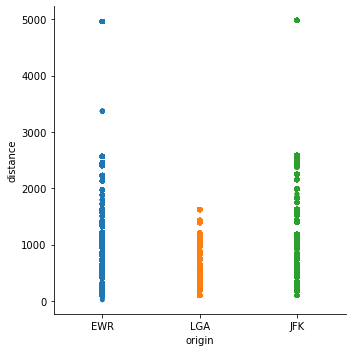

In [241]:
# Since we have not used the distance parameter and explored only seattle as destination, 
# let us look at distance to find out how far flights from NYC goes to varied locations, we also see which carriers are used where.
import seaborn as sns
sns.catplot(x="origin", y="distance", jitter = False, data=flights_df)


 From the above graph we get this insight that only JFK and EWR are used for farther distances, if we remove "jitter" we also get the density but we keep the jitter so that the distinction of distance is clear. LGA is used for shorter distances probably because it is not equipped for farther distances.

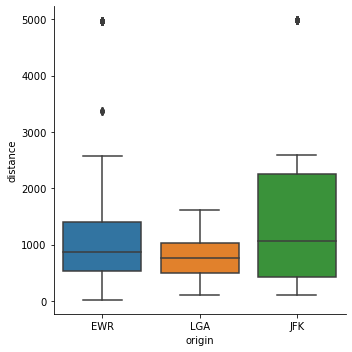

In [242]:
sns.catplot(x="origin", y="distance", kind="box", data=flights_df)

Although, EWR and JFK travel farther distances we see that mean of ALL 3 airports for flights travelling distance is comparable. The interquartile range (IQR) of LGA is lower than that of EWR and JFK. Outliers (points outside of IQR) for JFK are lower than that of JFK. Box plots are good way to represent as they give statistical as well as analytical insights.

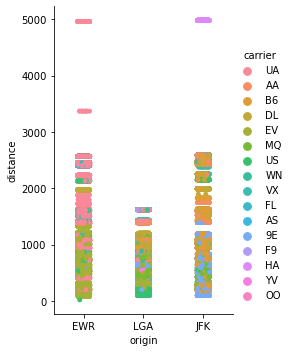

In [243]:
sns.catplot(x="origin", y="distance", hue="carrier", aspect=.7, data=flights_df)

Above graph shows relationship between airports and distance of flights from respective airports - it also states which carriers are most used at those airports (depending on shade).  

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore. Explain your findings.

In [244]:
# Let us load weather.csv first and look at its dimensions before exploring weather conditions
weather_df= pd.read_csv('C:/Users/Kruti/Desktop/IMT 574/PS01/flights/weather.csv')

print (weather_df.shape)   # rows and columns
print (weather_df.columns) # column names
print (weather_df.dtypes)  # data types of each column

(8719, 15)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object


In [245]:
# Before we analyse the delays, we need to merge nyc flight 2013 dataset (with only positive departure delays) to weather dataset

flights_filtered = positive_delay[['origin','year','month','day','hour','dep_delay']]
flights_merged_weather = pd.merge(weather_df, flights_filtered, on = ['origin','year','month','day','hour'])

print (flights_merged_weather.shape)   # rows and columns
print (flights_merged_weather.columns) # column names
print (flights_merged_weather.dtypes) 

(52557, 16)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib', 'dep_delay'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dep_delay     float64
dtype: object


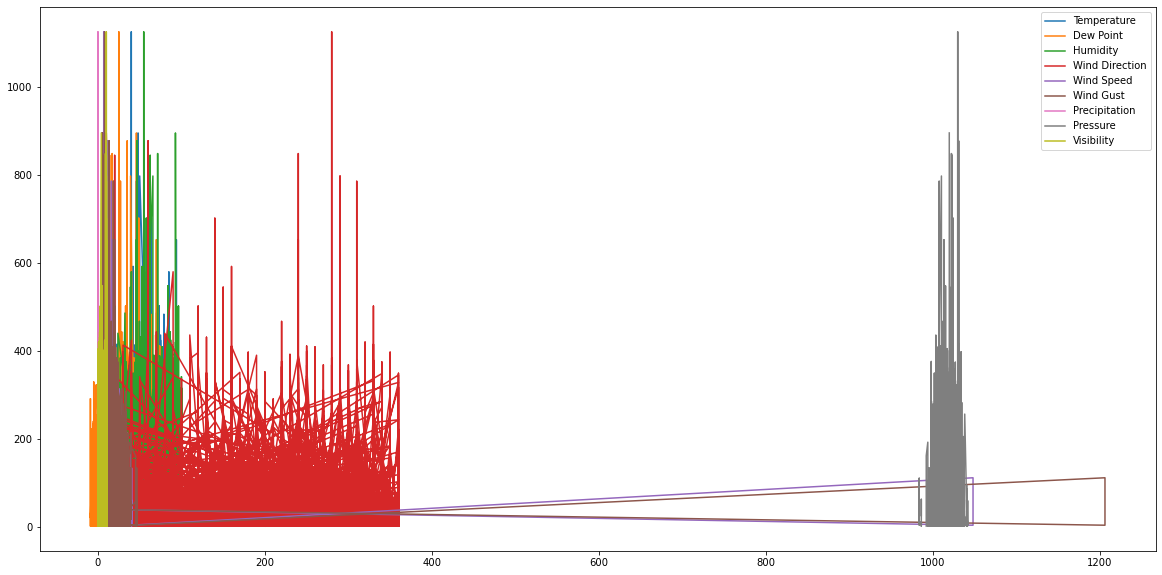

In [246]:
#Now, let us plot all the weather conditions against departure delays

plt.figure(figsize=(20,10))

plt.plot(flights_merged_weather.temp, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.dewp, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.humid, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.wind_dir, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.wind_speed, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.wind_gust, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.precip, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.pressure, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.visib, flights_merged_weather.dep_delay)

plt.legend(["Temperature", "Dew Point", "Humidity", "Wind Direction", "Wind Speed", "Wind Gust", "Precipitation", "Pressure", "Visibility"])

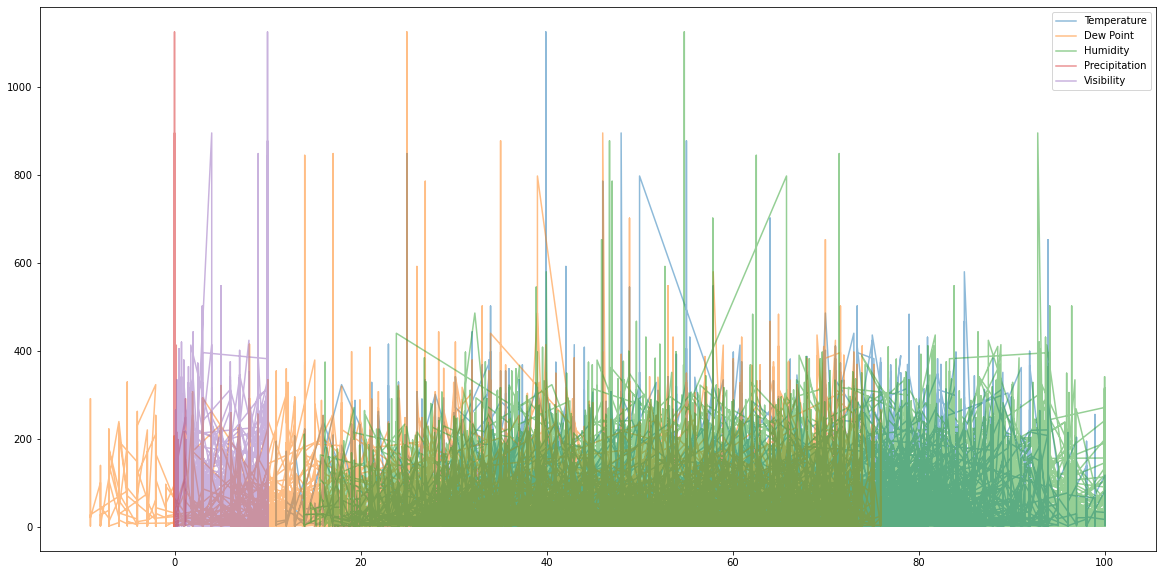

In [247]:
#I will seperate out pressure, wind gust, wind direction and wind speed because it has higher values, let us study relationship of others with departure delay
#Now, let us plot all the weather conditions against departure delays

plt.figure(figsize=(20,10))

plt.plot(flights_merged_weather.temp, flights_merged_weather.dep_delay,  alpha = 0.5)
plt.plot(flights_merged_weather.dewp, flights_merged_weather.dep_delay, alpha = 0.5)
plt.plot(flights_merged_weather.humid, flights_merged_weather.dep_delay, alpha = 0.5)
#plt.plot(flights_merged_weather.wind_dir, flights_merged_weather.dep_delay)
#plt.plot(flights_merged_weather.wind_speed, flights_merged_weather.dep_delay)
#plt.plot(flights_merged_weather.wind_gust, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.precip, flights_merged_weather.dep_delay, alpha = 0.5)
#plt.plot(flights_merged_weather.pressure, flights_merged_weather.dep_delay)
plt.plot(flights_merged_weather.visib, flights_merged_weather.dep_delay, alpha = 0.5)

plt.legend(["Temperature", "Dew Point", "Humidity", "Precipitation",  "Visibility"])

The graph above shows us the relationship between weather conditions as well as shows spike in departure delays. we can interpret that when precipitation is near 0, that is the time with maximum departure delays.
When temperature is 40F, that is the time with maximum departure delays. Similarly for spikes for other weather conditions.

We can study the plots also if we had made sperate plots but 1 graph shows all the relationships and helps us to analyse multiple parameters in a go.